## 코랩 런타임 끊김 방지

In [ ]:
%%html
<audio src="https://henk.tech/colabkobold/silence.m4a" controls>

## 구글 드라이브에 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/aiffel/AIFFELTHON

DATA = 'the-circor-digiscope-phonocardiogram-dataset-1.0.3/'
HOME_DIR = '/content/drive/MyDrive/aiffel/AIFFELTHON/'
PATH = HOME_DIR + DATA + 'training_data'
SAMPLE_RATE = 4000
HOP_LENGTH = 40

Mounted at /content/drive
/content/drive/MyDrive/aiffel/AIFFELTHON


## 데이터 분석

### 환자 ID를 train, test 데이터로 나눔

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# txt파일 불러오기
file_list = os.listdir(PATH)
txt_list = [os.path.join(PATH, file) for file in file_list if file.endswith(".txt")]

# 환자 아이디를 훈련 데이터셋과 테스트 데이터셋으로 나눔
train_patient_txt, test_patient_txt = train_test_split(txt_list, test_size=0.2, random_state=42)

# 결과 출력
print("Train Patient IDs:", train_patient_txt)
print("Test Patient IDs:", test_patient_txt)

Train Patient IDs: ['/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/82275.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50080.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/84945.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/49930.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50209.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/84933.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85338.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50742.txt', '/content/drive/MyDrive/aiff

In [3]:

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_list = os.listdir(PATH)
patient_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".txt")]

#------------------확인용-------------
wav_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".wav")]
label_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".tsv")]
head_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".hea")]

In [4]:
heas = []
wavs = []
tsvs = []

In [5]:
for path_txt in patient_list:
    #print("{0}.hea".format(path_txt[:-4]))
    with open("{0}.txt".format(path_txt[:-4]), "r") as f:
        P_id, n, sr = f.readline().split()
        for _ in range(int(n)):
            #print(f.readline())
            _, hea, wav, tsv = f.readline().split()
            heas.append(hea)
            wavs.append(wav)
            tsvs.append(tsv)

In [6]:
# 음성 길이 확인
hea_list=[]
for hea in heas:
    path_hea = os.path.join(PATH,hea)
    with open(path_hea, "r") as f:
        id, _, sr, length = f.readline().split()
        hea_list.append(int(length)/float(sr))

평균 :  22.87030121719886
최대값 :  64.512
최소값 :  5.152
----
25
2545


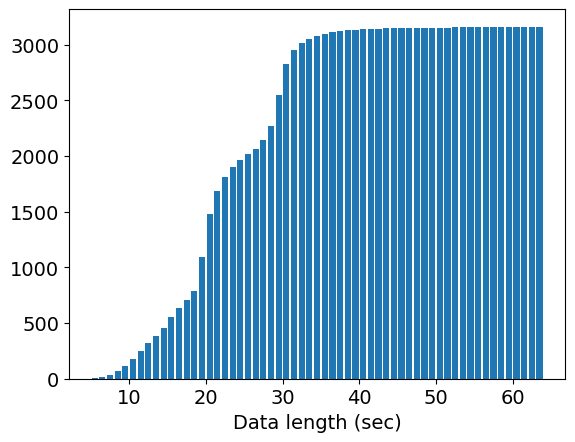

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hea_list = np.array(hea_list) ## 데이터
bins = np.arange(5,65,1)

print("평균 : ", np.average(hea_list))
print("최대값 : ", np.max(hea_list))
print("최소값 : ", np.min(hea_list))

cut = pd.cut(hea_list, bins=bins) ## 데이터를 일정 구간으로 n등분한다.
#print(cut.describe())

plt.hist(hea_list, bins, rwidth = 0.8, cumulative=True)
plt.xlabel('Data length (sec)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
print("----")
hist, _ =np.histogram(hea_list, bins=bins)
end_index = np.searchsorted(bins, 29, side='right')
print(end_index)

count = np.sum(hist[0:25])
print(count)#5~28초 사이의 데이터 개수

In [8]:
s1_ranges = []
s2_ranges = []
for tsv in tsvs:
    path_tsv = os.path.join(PATH,tsv)
    with open(path_tsv, "r") as f:
        while 1:
            line = f.readline()
            if not line: break
            start, end, s_type = line.split()
            if s_type == "1":
                s1_ranges.append(float(end)-float(start))

            elif  s_type == "3":
                s2_ranges.append(float(end)-float(start))

In [9]:
s1_ranges = np.array(s1_ranges) ## 데이터
s2_ranges = np.array(s2_ranges)

bins = np.arange(5,65,1)

print("s1 길이 최소값 : ", np.min(s1_ranges))
print("s1 길이 최대값 : ", np.max(s1_ranges))
print("s1 길이 평균 : ", np.average(s1_ranges))
print("---------------------")
print("s2 길이 최소값 : ", np.min(s2_ranges))
print("s2 길이 최대값 : ", np.max(s2_ranges))
print("s2 길이 평균 : ", np.average(s2_ranges))

s1 길이 최소값 :  0.008209000000000799
s1 길이 최대값 :  0.7291699999999999
s1 길이 평균 :  0.119164496582365
---------------------
s2 길이 최소값 :  0.0008700000000008146
s2 길이 최대값 :  0.6797499999999985
s2 길이 평균 :  0.10533918449571068


### tsv파일 기준 최상단, 최하단 기준으로 각각 두 번째 줄의 S1, S2구간 측정  

In [21]:
s1_ranges = []
s2_ranges = []
labels = []
cnt = 0
for i, path_tsv in enumerate(tsvs):
    label = []
    path = os.path.join(PATH, path_tsv)
    tsv_data = pd.read_csv(path, sep='\t', header=None)
    # if self.resizing is True:
    #     scale = self.scale_list[i]
    for line, tsv_row in tsv_data.iterrows():
        if tsv_row[2] in [1, 3]:
            # 구간 불러와서 sr값 곱하고 hop_legth로 나누기
            tsv_row[0] *= SAMPLE_RATE / HOP_LENGTH
            tsv_row[1] *= SAMPLE_RATE / HOP_LENGTH
            tsv_row[2] = 0 if tsv_row[2] == 1 else 1    # S1=0, S2=1

            # 앞뒤로 두 번째 줄에 있는 데이터
            if line == 1 or line == len(tsv_data) - 2:

                # # 0.01초 미만인 데이터의 개수
                # s_range = tsv_row[1] - tsv_row[0]
                # if s_range < 1:
                #     cnt += 1
                #     continue

                # 0.01초 미만인 데이터 상세 정보
                if tsv_row[2] == 0:
                    s1 = tsv_row[1] - tsv_row[0]
                    if s1 < 1:
                        s1_ranges.append(s1)
                        print(f'File: {path_tsv} | \
                                S1 range: {s1} (start: {tsv_row[0]}, end: {tsv_row[1]})')
                else:
                    s2 = tsv_row[1] - tsv_row[0]
                    if s2 < 1:
                        s2_ranges.append(s2)
                        print(f'File: {path_tsv} | \
                                S2 range: {s2} (start: {tsv_row[0]}, end: {tsv_row[1]})')

# print(f'0.01초 미만인 데이터 개수: {cnt}')

File: 84974_MV.tsv |                                 S1 range: 0.920300000000001 (start: 16.45, end: 17.3703)
File: 84874_TV.tsv |                                 S1 range: 0.8635000000000446 (start: 857.7882000000001, end: 858.6517000000001)
File: 84687_MV.tsv |                                 S2 range: 0.9816000000000713 (start: 1108.125, end: 1109.1066)
File: 50752_AV.tsv |                                 S1 range: 0.8209000000000515 (start: 498.01529999999997, end: 498.8362)
File: 85329_TV.tsv |                                 S2 range: 0.08700000000010277 (start: 519.9499999999999, end: 520.037)
File: 84952_TV.tsv |                                 S2 range: 0.6628000000000611 (start: 705.3499999999999, end: 706.0128)


In [22]:
s1_ranges = np.array(s1_ranges) ## 데이터
s2_ranges = np.array(s2_ranges)

print("s1 길이 최소값 : ", np.min(s1_ranges))
print("s1 길이 최대값 : ", np.max(s1_ranges))
print("s1 길이 평균 : ", np.average(s1_ranges))
print("---------------------")

print("s2 길이 최소값 : ", np.min(s2_ranges))
print("s2 길이 최대값 : ", np.max(s2_ranges))
print("s2 길이 평균 : ", np.average(s2_ranges))

s1 길이 최소값 :  0.8209000000000515
s1 길이 최대값 :  0.920300000000001
s1 길이 평균 :  0.8682333333333657
---------------------
s2 길이 최소값 :  0.08700000000010277
s2 길이 최대값 :  0.9816000000000713
s2 길이 평균 :  0.5771333333334118


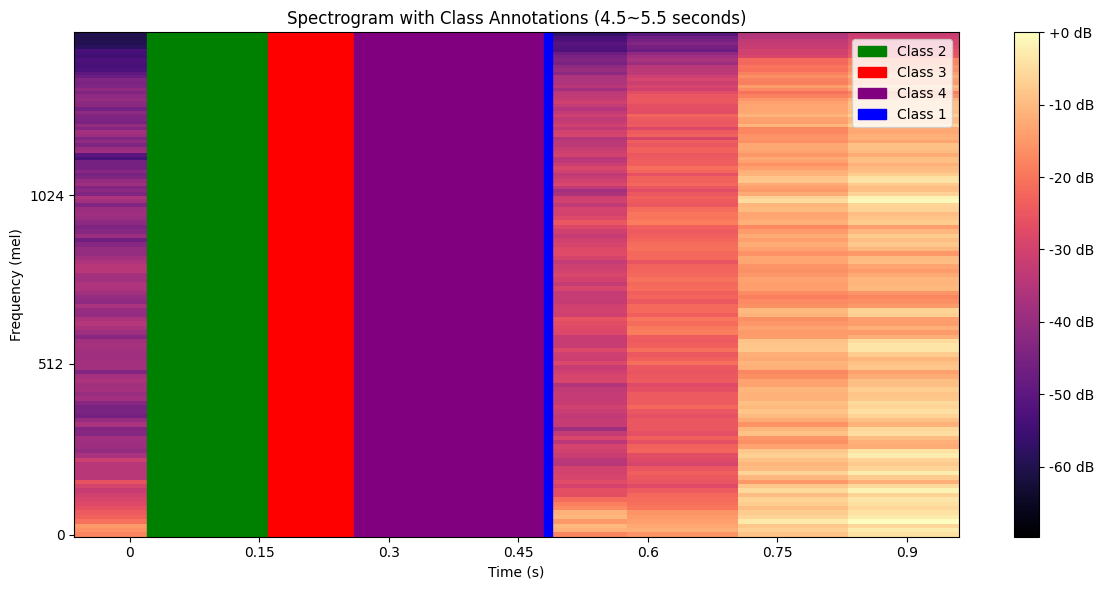

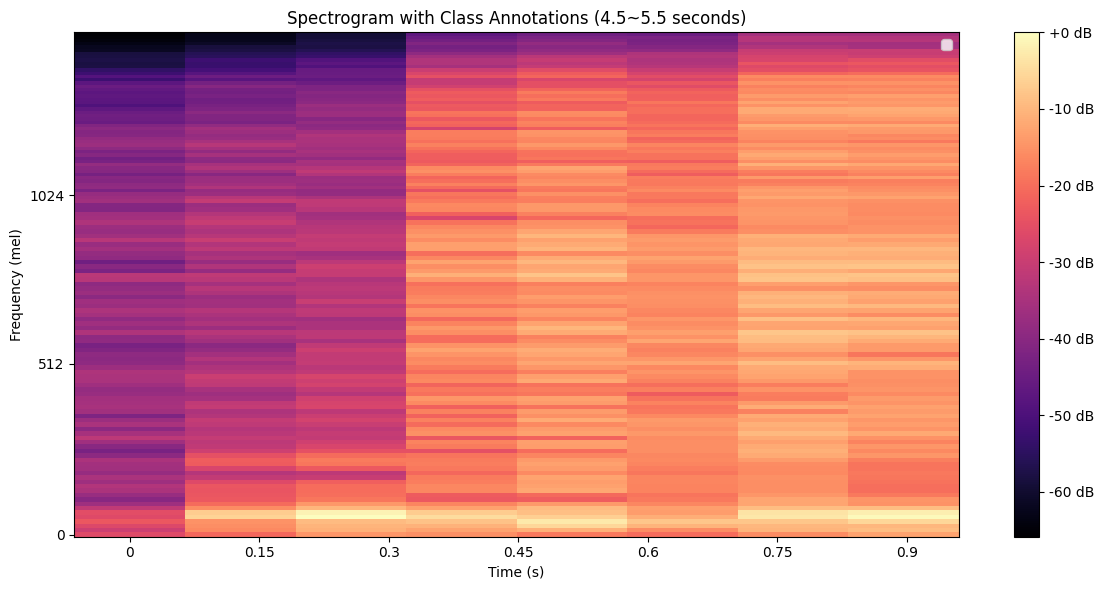

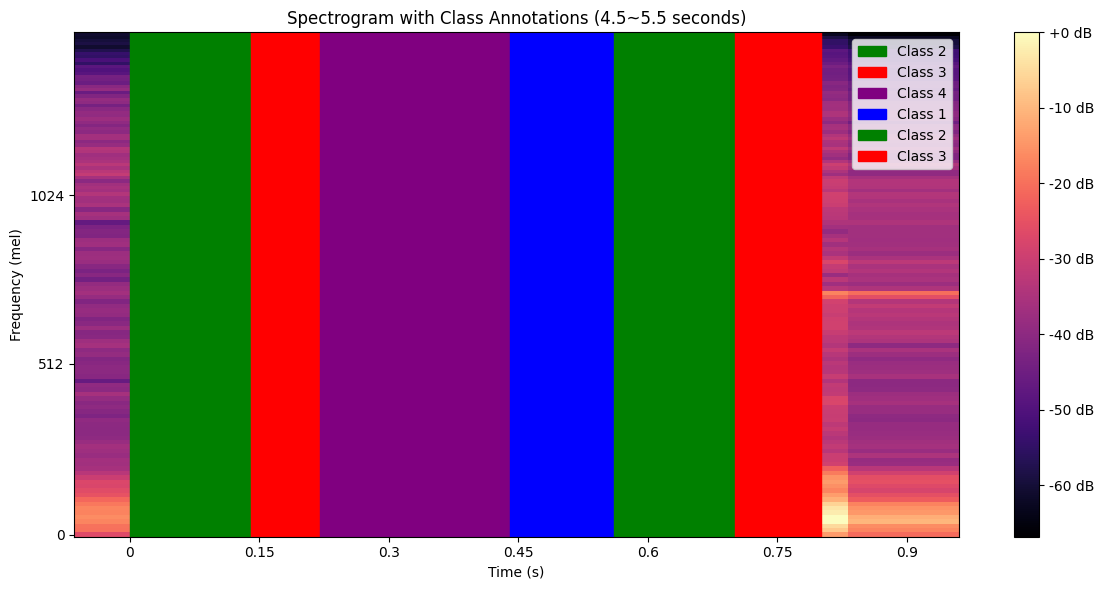

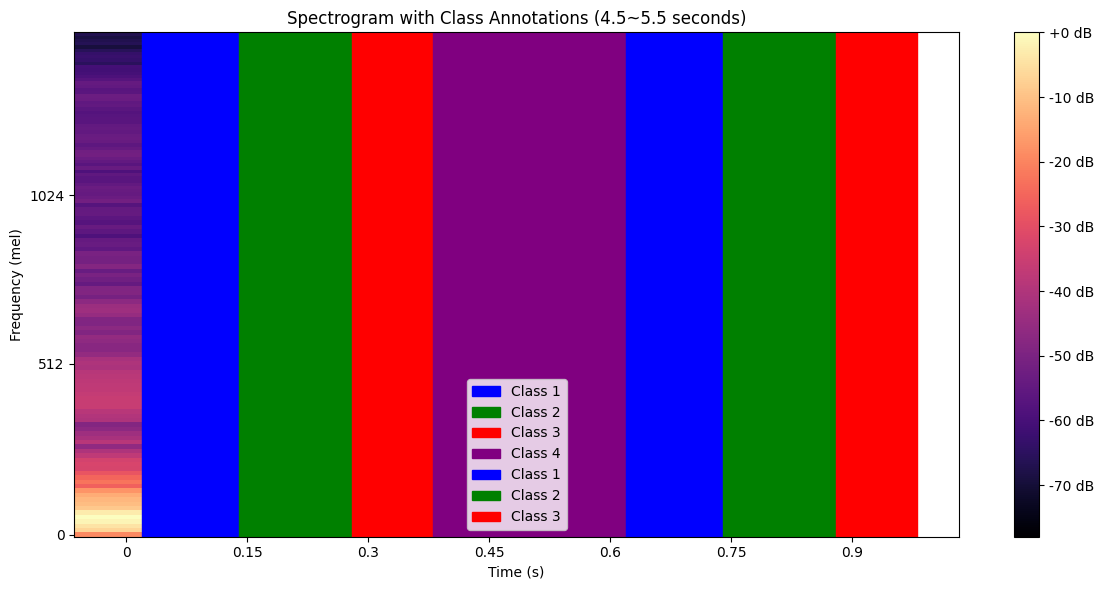

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def visualize_spectrogram(file_name, start_time, end_time):
    # tsv 파일 로드
    tsv_file_path = HOME_DIR + DATA + 'training_data/' + file_name + '.tsv'
    tsv_data = pd.read_csv(tsv_file_path, sep='\t', header=None)

    # 데이터 추출
    start_times = tsv_data.iloc[:, 0]
    end_times = tsv_data.iloc[:, 1]
    classes = tsv_data.iloc[:, 2]

    # .wav 파일 로드
    wav_file_path = HOME_DIR + DATA + 'training_data/' + file_name + '.wav'
    wav_data, sample_rate = librosa.load(wav_file_path, sr=None, offset=start_time, duration=end_time-start_time)

    # 클래스에 따라 하이라이트 색 지정
    colors = ['blue', 'green', 'red', 'purple']

    plt.figure(figsize=(12, 6))

    # 스펙트로그램 계산
    specgram = librosa.feature.melspectrogram(y=wav_data, sr=sample_rate)

    # 스펙트로그램 표시
    librosa.display.specshow(librosa.power_to_db(specgram, ref=np.max), x_axis='time', y_axis='mel', sr=sample_rate)

    # 클래스에 따라 하이라이트 표시
    for i in range(len(start_times)):
        if classes[i] in [1, 2, 3, 4]:
            if start_times[i] >= start_time and end_times[i] <= end_time:
                plt.axvspan(start_times[i] - start_time, end_times[i] - start_time, color=colors[classes[i] - 1], alpha=1.0, label=f'Class {classes[i]}')

    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram with Class Annotations ({start_time}~{end_time} seconds)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (mel)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 사용 예시
for i in ['AV', 'MV', 'PV', 'TV']:
    FILE_NAME = '50752' + '_' + i
    visualize_spectrogram(FILE_NAME, start_time=4.5, end_time=5.5)  # 파일 이름과 구간을 설정하세요

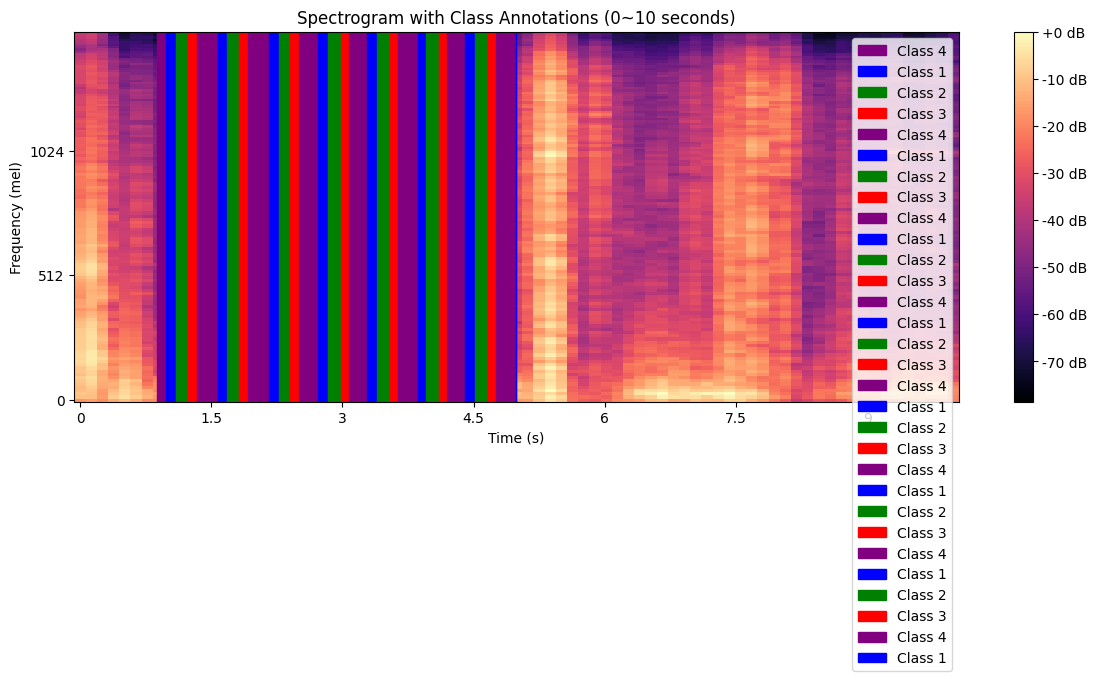

In [26]:
FILE_NAME = '50752' + '_' + 'AV'
visualize_spectrogram(FILE_NAME, start_time=0, end_time=10)  # 파일 이름과 구간을 설정하세요

## 데이터 변환
## wav => (전체 파일 개수, 주파수, 시간)
## tsv => (class, x1, x2)

In [17]:
import os
import numpy as np
import librosa
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from scipy.interpolate import interp1d

class CustomDataset(Dataset):
    def __init__(self, path, txt_list, target_size=(40, 2500), resizing=False, th=25):
        self.path = path
        self.txt_list = txt_list
        self.target_size = target_size
        self.th = int(th * SAMPLE_RATE / HOP_LENGTH)
        self.resizing = resizing

        self.get_file_list()
        self.x, self.scale_list = self.get_mel_spectrogram()
        self.y = self.get_label()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def get_file_list(self):
        self.heas = []
        self.wavs = []
        self.tsvs = []

        for path_txt in self.txt_list:
            with open(path_txt, "r") as f:
                P_id, n, sr = f.readline().split()
                for _ in range(int(n)):
                    _, hea, wav, tsv = f.readline().split()
                    self.heas.append(hea)
                    self.wavs.append(wav)
                    self.tsvs.append(tsv)
        self.heas.sort()
        self.wavs.sort()
        self.tsvs.sort()

    def padding(self, arr, target_length, padding_value=0):
        current_length = arr.shape[-1]
        pad_width = target_length - current_length
        if pad_width > 0:
            arr = np.pad(
                arr,
                ((0, 0), (0, pad_width)),
                mode='constant',
                constant_values=padding_value)
        return arr

    def resize_spectrogram(self, spec, new_shape):
        resized_spec = resize(spec, new_shape, mode='reflect')
        return resized_spec

    def get_mel_spectrogram(self):
        audio_arr = []
        scale_list = []

        for path_wav in self.wavs:
            path = os.path.join(self.path, path_wav)
            x = librosa.load(path, sr=SAMPLE_RATE)[0]
            ms = librosa.feature.melspectrogram(
                y=x,
                sr=SAMPLE_RATE,
                n_fft=128,
                win_length=100,
                hop_length=HOP_LENGTH,
                n_mels=40)

            scale = 1
            # th보다 길이가 길다면 Slicing
            if ms.shape[-1] > self.th:
                ms = ms[:, :self.th]
            # th보다 길이가 짧다면
            elif ms.shape[-1] < self.th:
                # Resizing
                if self.resizing is True:
                    scale = self.th / ms.shape[1]
                    target_shape = (ms.shape[0], self.th)
                    ms = self.resize_spectrogram(ms, target_shape)
                # Padding
                else:
                    ms = self.padding(ms, self.th)
            # 최종 Resizing
            ms = self.resize_spectrogram(ms, self.target_size)
            audio_arr.append(ms)
            if self.resizing is True:
                scale_list.append(scale)
        return audio_arr, scale_list

    def get_label(self):
        labels = []
        for i, path_tsv in enumerate(self.tsvs):
            label = []
            path = os.path.join(self.path, path_tsv)
            tsv_data = pd.read_csv(path, sep='\t', header=None)
            if self.resizing is True:
                scale = self.scale_list[i]
            for line, tsv_row in tsv_data.iterrows():
                if tsv_row[2] in [1, 3]:
                    # 구간 불러와서 sr값 곱하고 hop_legth로 나누기
                    tsv_row[0] *= SAMPLE_RATE / HOP_LENGTH
                    tsv_row[1] *= SAMPLE_RATE / HOP_LENGTH
                    tsv_row[2] = 0 if tsv_row[2] == 1 else 1    # S1=0, S2=1

                    # 앞뒤로 두 번째 줄에 있는 길이가 0.01초 미만인 S1, S2 제거
                    if line == 1 or line == len(tsv_data) - 2:
                        s_range = tsv_row[1] - tsv_row[0]
                        if s_range < 1:
                            continue

                    # th보다 길이가 길다면 Slicing
                    if tsv_row[0] > self.th or tsv_row[1] > self.th:
                        break
                    # th보다 길이가 짧다면
                    else:
                        # resize를 하였다면 라벨 값도 스케일링
                        if self.resizing is True:
                            tsv_row[0] *= scale
                            tsv_row[1] *= scale
                        # 최종 resize한 값 으로 보간
                        tsv_row[0] *= self.target_size[1] / self.th
                        tsv_row[1] *= self.target_size[1] / self.th
                        label.append((int(tsv_row[2]), tsv_row[0], tsv_row[1]))
            labels.append(label)
        return labels

### 패딩, 리사이징 결과 히스토그램 시각화

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=128 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=128 is too large for input signal of length=0
  warnings.warn(


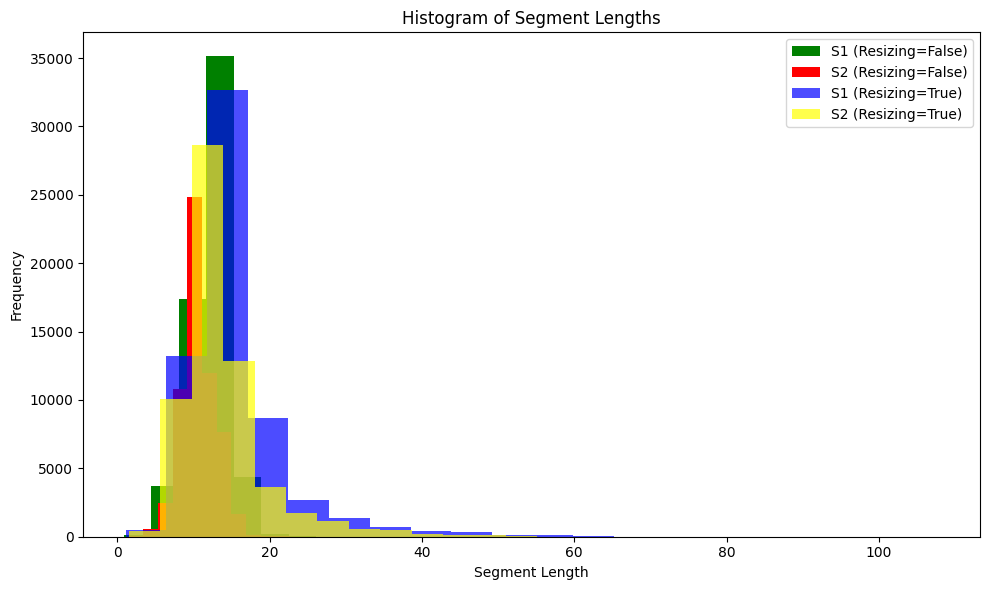

S1 (Resizing=False):
  Min Length: 0.8779000000001815
  Max Length: 72.91699999999992
  Mean Length: 11.917047800735824 

S1 (Resizing=True):
  Min Length: 1.1260903027196036
  Max Length: 107.91366906474877
  Mean Length: 15.211365370853212 

S2 (Resizing=False):
  Min Length: 1.5146999999999906
  Max Length: 39.97499999999991
  Mean Length: 10.555064259483892 

S2 (Resizing=True):
  Min Length: 1.5427999999999997
  Max Length: 84.03365384615336
  Mean Length: 13.48194258486907 



In [18]:
import matplotlib.pyplot as plt

# 데이터셋 생성
dataset_resizing_false = CustomDataset(PATH, txt_list, resizing=False)
dataset_resizing_true = CustomDataset(PATH, txt_list, resizing=True)

# 데이터와 레이블 추출
data_resizing_false = dataset_resizing_false.x
labels_resizing_false = dataset_resizing_false.y

data_resizing_true = dataset_resizing_true.x
labels_resizing_true = dataset_resizing_true.y

# 클래스별 데이터 길이 저장
class_lengths_resizing_false = {0: [], 1: []}
class_lengths_resizing_true = {0: [], 1: []}

for i in range(len(data_resizing_true)):
    spec_false = data_resizing_false[i]
    label_false = labels_resizing_false[i]
    spec_true = data_resizing_true[i]
    label_true = labels_resizing_true[i]

    for l in label_false:
        class_id, start, end = l
        class_lengths_resizing_false[class_id].append(end - start)

    for l in label_true:
        class_id, start, end = l
        class_lengths_resizing_true[class_id].append(end - start)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))

plt.hist(class_lengths_resizing_false[0], bins=20, alpha=1.0, color='green', label='S1 (Resizing=False)')
plt.hist(class_lengths_resizing_false[1], bins=20, alpha=1.0, color='red', label='S2 (Resizing=False)')
plt.hist(class_lengths_resizing_true[0], bins=20, alpha=0.7, color='blue', label='S1 (Resizing=True)')
plt.hist(class_lengths_resizing_true[1], bins=20, alpha=0.7, color='yellow', label='S2 (Resizing=True)')

plt.xlabel("Segment Length")
plt.ylabel("Frequency")
plt.title("Histogram of Segment Lengths")
plt.legend()

plt.tight_layout()
plt.show()

for class_id in [0, 1]:
    print(f"S{class_id + 1} (Resizing=False):")
    print("  Min Length:", np.min(class_lengths_resizing_false[class_id]))
    print("  Max Length:", np.max(class_lengths_resizing_false[class_id]))
    print("  Mean Length:", np.mean(class_lengths_resizing_false[class_id]), "\n")

    print(f"S{class_id + 1} (Resizing=True):")
    print("  Min Length:", np.min(class_lengths_resizing_true[class_id]))
    print("  Max Length:", np.max(class_lengths_resizing_true[class_id]))
    print("  Mean Length:", np.mean(class_lengths_resizing_true[class_id]), "\n")


### 데이터, 라벨 변환 결과 이미지로 시각화

(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)
(40, 2500)


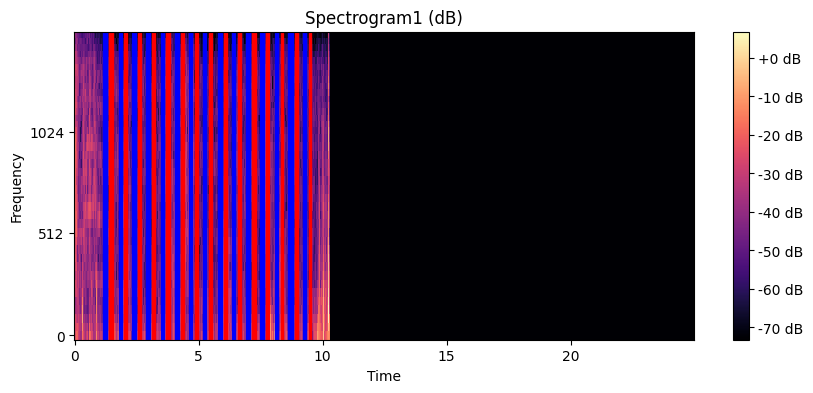

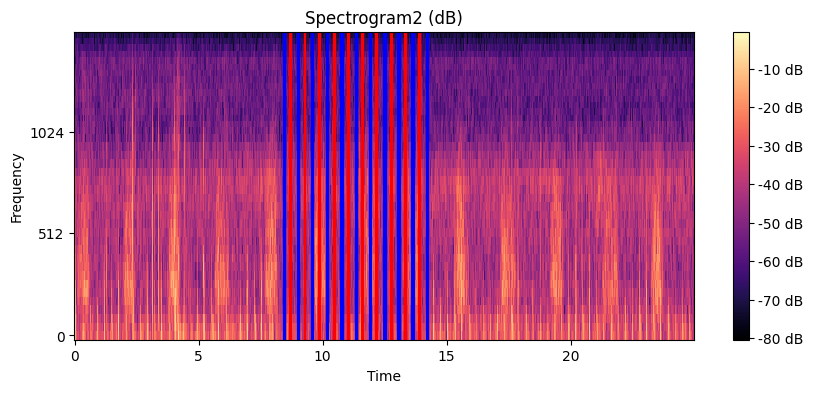

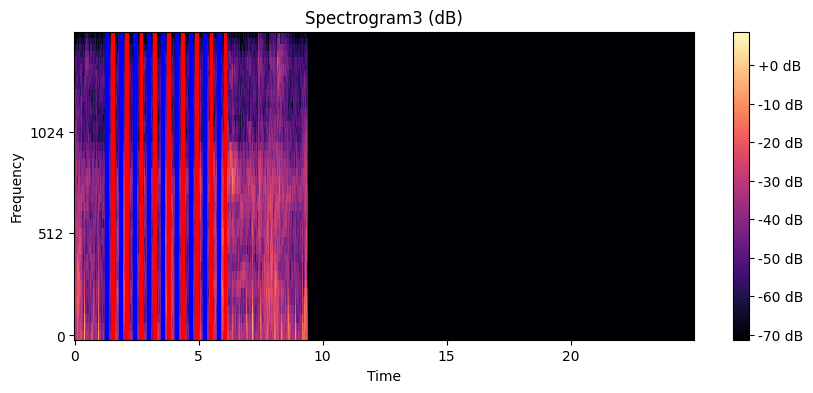

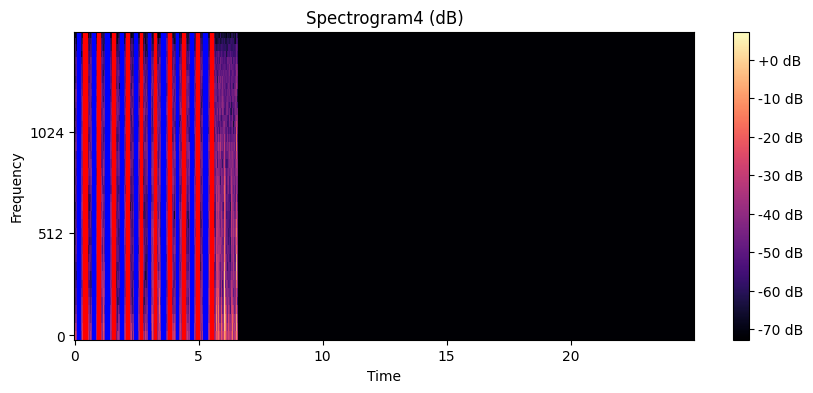

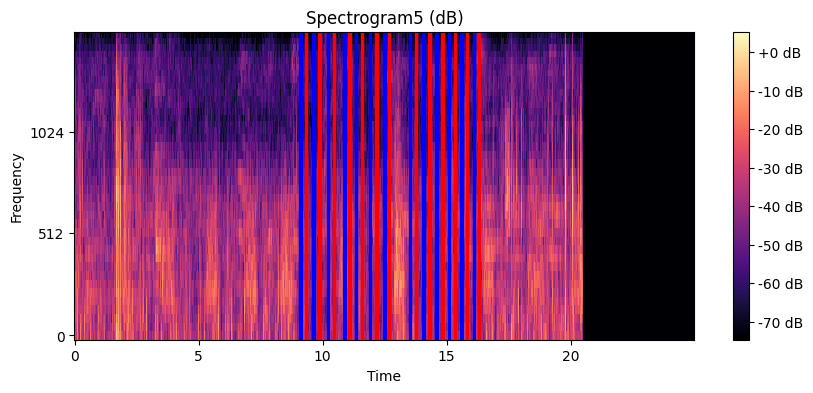

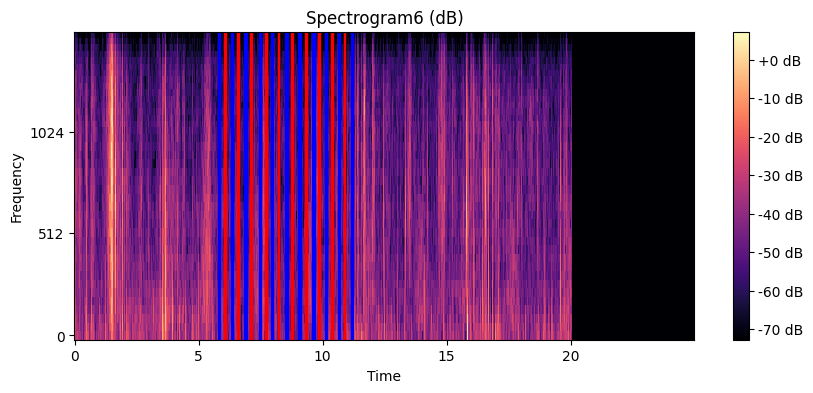

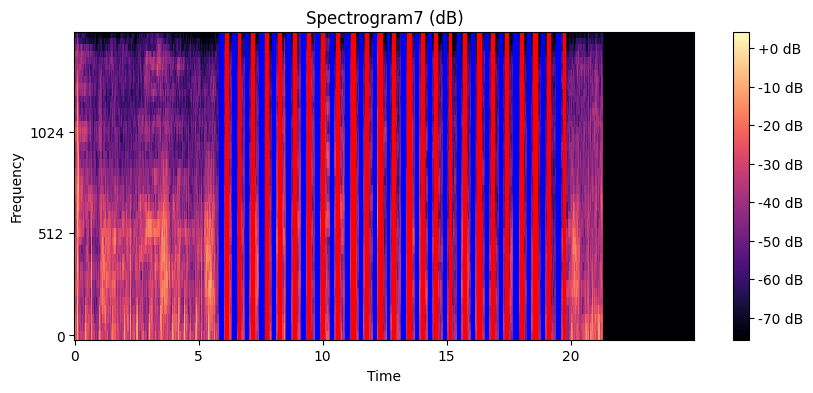

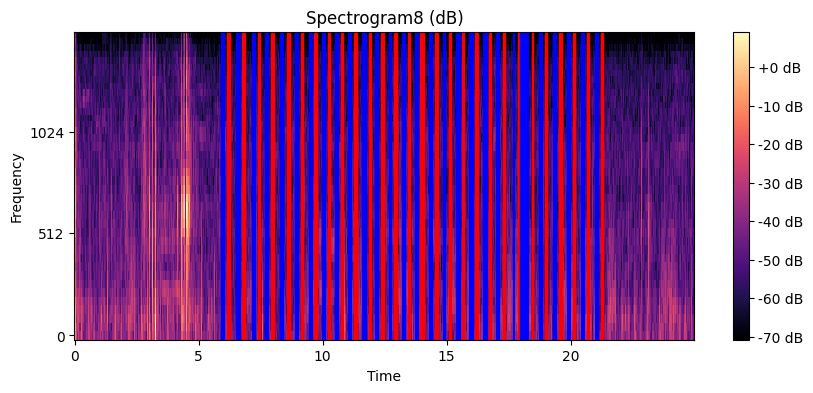

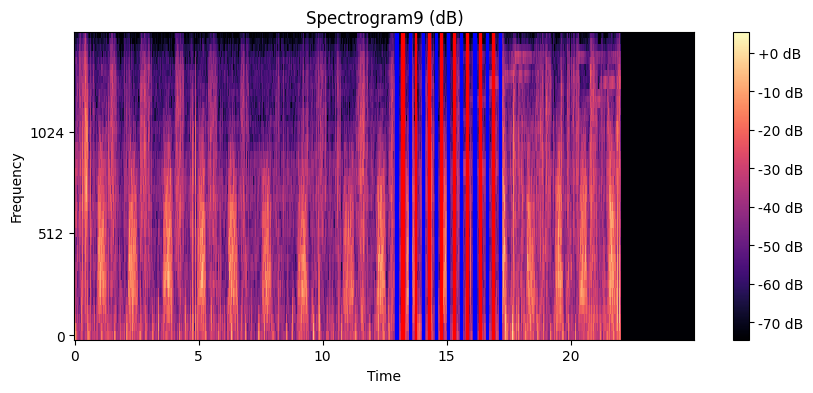

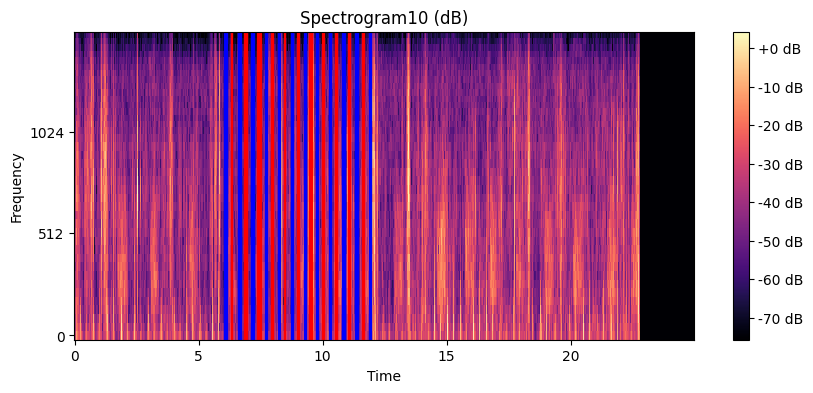

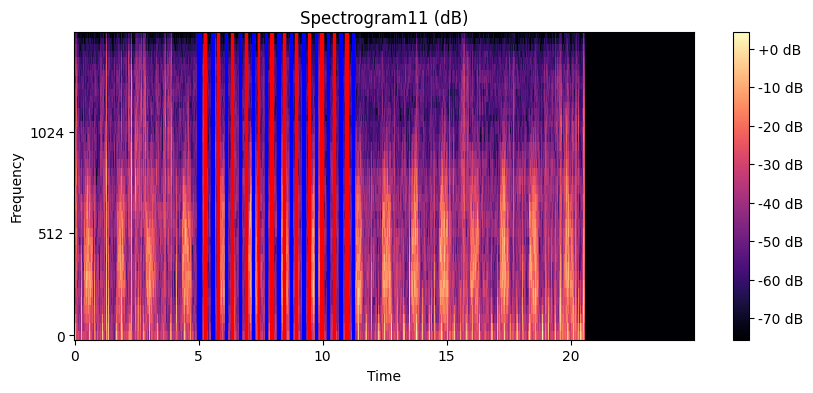

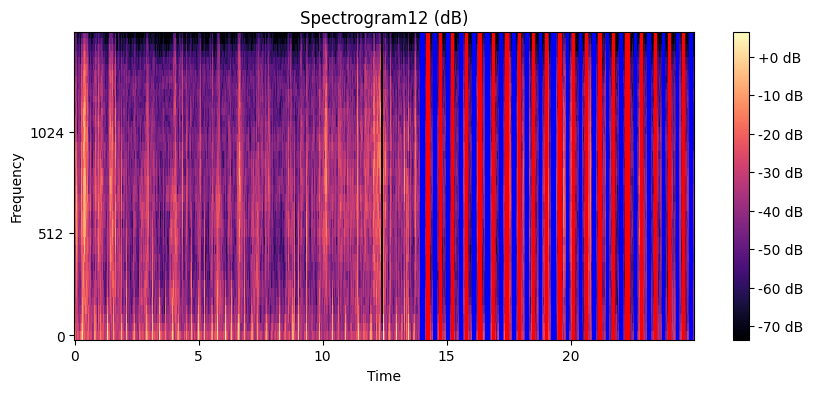

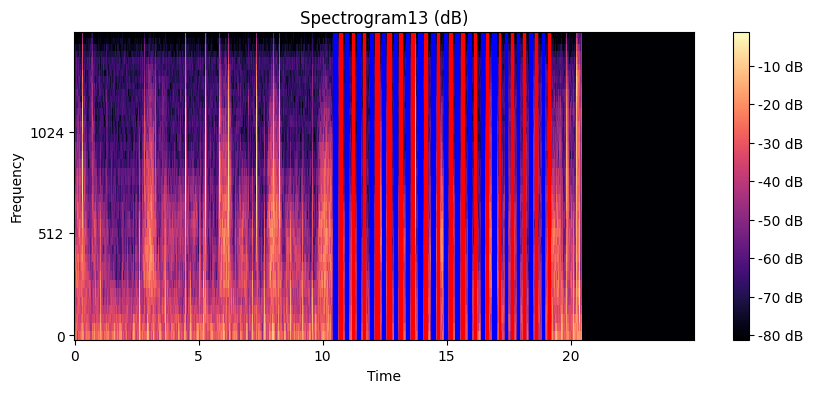

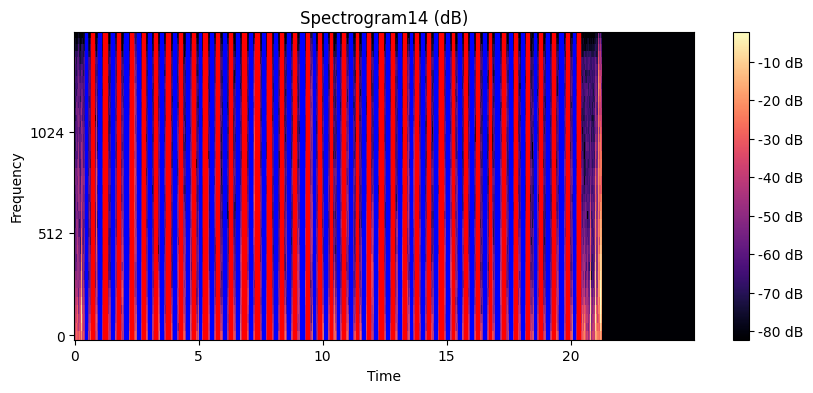

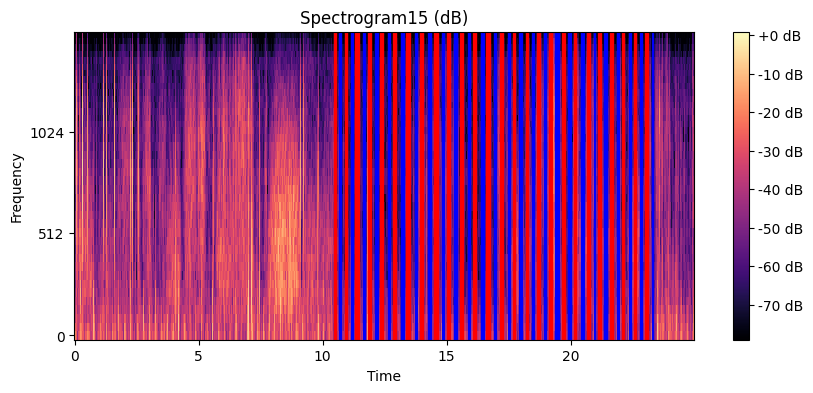

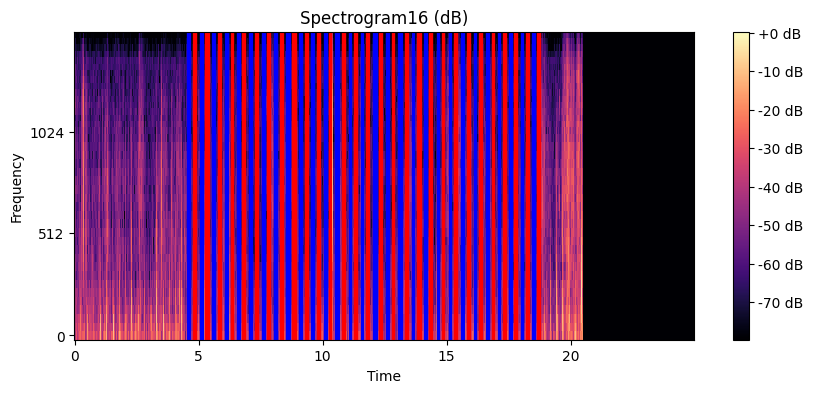

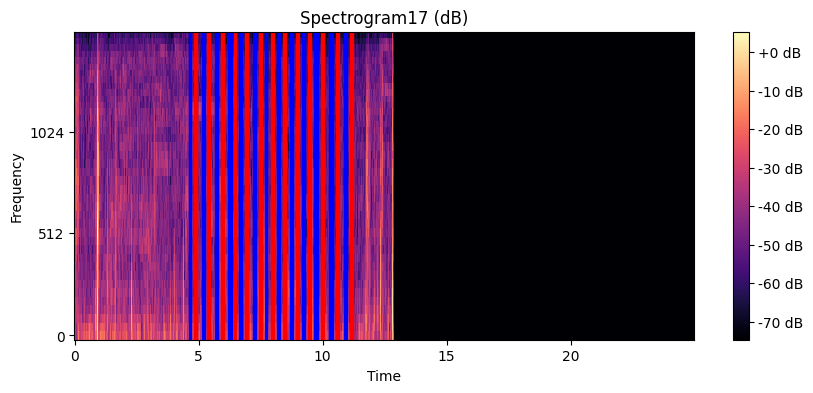

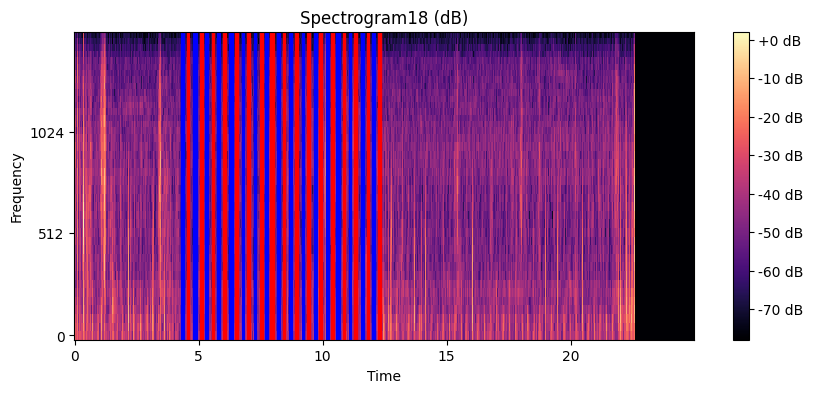

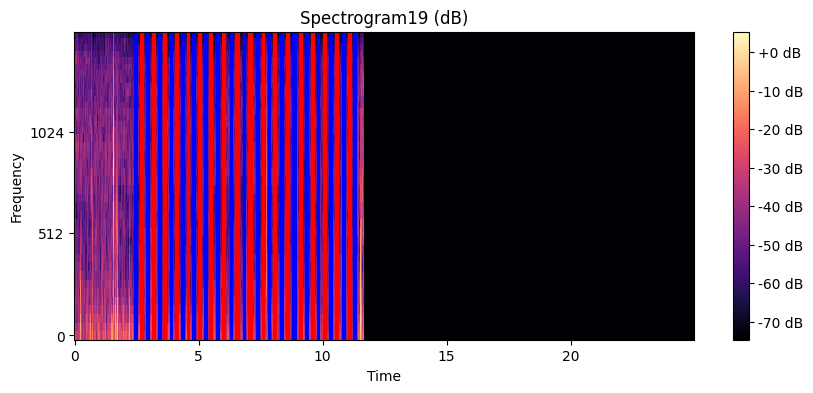

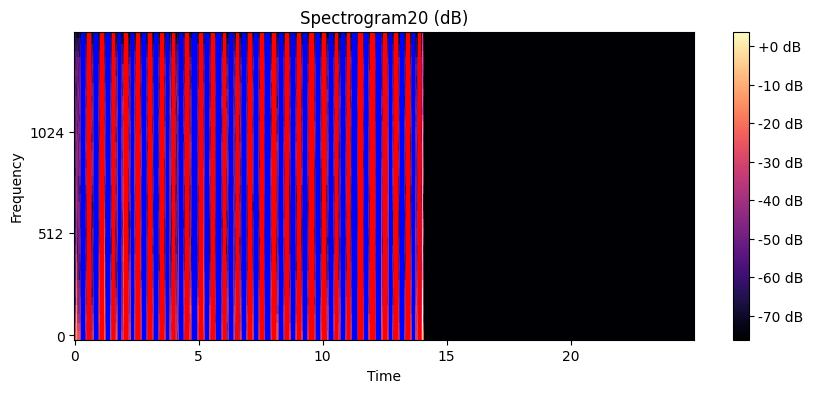

In [20]:
import matplotlib.pyplot as plt

dataset = dataset_resizing_false

for i, d in enumerate(dataset):
    if i == 20:
        break
    x, y = d
    print(x.shape)

    plt.figure(figsize=(10,4))
    # 스펙트로그램 시각화
    librosa.display.specshow(
        librosa.power_to_db(x), sr=SAMPLE_RATE, hop_length=HOP_LENGTH, x_axis='time', y_axis='mel')

    # 레이블 시각화
    for label in y:
        class_id, start, end = label
        start /= SAMPLE_RATE / HOP_LENGTH
        end /= SAMPLE_RATE / HOP_LENGTH
        color = 'red' if class_id == 1 else 'blue'
        plt.axvspan(start, end, color=color)

    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram{i + 1} (dB)")